# 对DOT解析器全球部署进行分析 

In [1]:
%matplotlib inline
import json
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import random
from folium.plugins import MarkerCluster
from mpl_toolkits.basemap import Basemap

In [2]:
ip_raw = pd.read_json("./doh-location-ip.txt",lines=True)
ip_raw = pd.DataFrame(ip_raw,columns = ['query','country','isp','org','lat','lon'])
ip_raw = ip_raw.rename(columns={"query":"ip"})
ip_raw

,ip,country,isp,org,lat,lon
0,1.0.0.1,Australia,"Cloudflare, Inc",APNIC and Cloudflare DNS Resolver project,-27.47660,153.01660
1,1.0.0.2,Australia,"Cloudflare, Inc",APNIC and Cloudflare DNS Resolver project,-27.47660,153.01660
2,1.0.0.3,Australia,"Cloudflare, Inc",APNIC and Cloudflare DNS Resolver project,-27.47660,153.01660
3,101.100.188.23,Singapore,Myrepublic Limited,Republictelecom,1.31857,103.95000
4,101.101.101.101,Taiwan,Taiwan Network Information Center,Twnic Experimental,25.03300,121.56500
...,...,...,...,...,...,...
9329,163.44.153.212,Japan,GMO-Z.COM PTE. LTD.,"GMO Internet, Inc.",35.65650,139.70000
9330,164.160.130.158,Nigeria,GARANNTOR,,6.58849,3.36369
9331,164.90.155.71,United States,"DigitalOcean, LLC","DigitalOcean, LLC",37.39310,-121.96200
9332,164.90.161.84,Germany,"DigitalOcean, LLC","DigitalOcean, LLC",50.11880,8.68430


In [3]:
doh_raw = pd.read_csv("../../递归解析器/DOH/raw_data/result_doh.txt")
doh_raw = pd.DataFrame(doh_raw,columns = ['ip'])

ip_raw = pd.merge(doh_raw,ip_raw,on=['ip'])
ip_raw

,ip,country,isp,org,lat,lon
0,1.0.0.2,Australia,"Cloudflare, Inc",APNIC and Cloudflare DNS Resolver project,-27.4766,153.0166
1,130.61.56.82,Germany,Oracle Corporation,Oracle Cloud Infrastructure (eu-frankfurt-1),50.1049,8.6295
2,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
3,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
4,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
...,...,...,...,...,...,...
23190,52.42.134.63,United States,"Amazon.com, Inc.",AWS EC2 (us-west-2),45.5235,-122.6760
23191,63.240.152.245,United States,CERFnet,Snap-on Incorporated,42.5842,-87.8216
23192,63.240.152.245,United States,CERFnet,Snap-on Incorporated,42.5842,-87.8216
23193,63.240.152.245,United States,CERFnet,Snap-on Incorporated,42.5842,-87.8216


In [4]:
test = ip_raw.head(1000)
test

,ip,country,isp,org,lat,lon
0,1.0.0.2,Australia,"Cloudflare, Inc",APNIC and Cloudflare DNS Resolver project,-27.4766,153.0166
1,130.61.56.82,Germany,Oracle Corporation,Oracle Cloud Infrastructure (eu-frankfurt-1),50.1049,8.6295
2,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
3,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
4,135.84.249.13,India,"iZus Co., Ltd",Scape Reach LTD,12.8696,74.8453
...,...,...,...,...,...,...
995,103.241.30.116,Thailand,"Eagle Sky Co., Lt","WIN SOON LEE CO., LTD",13.7263,100.5920
996,103.241.30.116,Thailand,"Eagle Sky Co., Lt","WIN SOON LEE CO., LTD",13.7263,100.5920
997,146.88.165.147,India,"iZus Co., Ltd",Scape Reach LTD,26.2306,78.1803
998,146.88.165.147,India,"iZus Co., Ltd",Scape Reach LTD,26.2306,78.1803


## 画图-1 

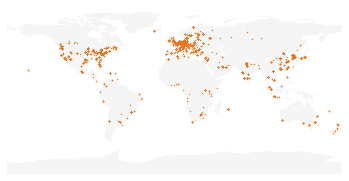

In [5]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="#e87722"
fig = plt.figure()
ax = plt.gca()
m = Basemap(resolution='c')
m.fillcontinents(color='whitesmoke',zorder=1)
# m.shadedrelief()
m.drawcoastlines(color='gray',linewidth=0.01)
# m.drawcountries(color='gray',linewidth=0.01)
# m.drawstates(color='gray',linewidth=0.1)

for i in range(len(ip_raw)):
    x =  ip_raw.iloc[i]["lat"]
    y =  ip_raw.iloc[i]["lon"]
    m.scatter(y, x, 0.1, marker='D', color=TUMOrange,zorder=2)
# for i in range(len(test)):
#     x =  test.iloc[i]["lat"]
#     y =  test.iloc[i]["lon"]
#     m.scatter(y, x, 0.1, marker='D', color="red",zorder=2)
    
# plt.title('Global distribution map of DNS over HTTPS resolvers', fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig("./basemap-doh-ip.pdf")
plt.show()

## 画图-2 

#  对流行公司进行分析

In [4]:
nextdns = ip_raw[ip_raw["org"].str.contains("nextdns") | ip_raw["org"].str.contains("NextDNS")]
print("nextdns",len(nextdns))
SFR = ip_raw[ip_raw["org"].str.contains("SFR")]
print("SFR",len(SFR))
Cloudflare = ip_raw[ip_raw["org"].str.contains("Cloudflare")]
print("cloudflare",len(Cloudflare))
Cleanbrowsing = ip_raw[ip_raw["org"].str.contains("Cleanbrowsing")]
print("Cleanbrowsing",len(Cleanbrowsing))
broadNnet = ip_raw[ip_raw["org"].str.contains("broadNnet")]
print("broadNnet",len(broadNnet))
Telepark = ip_raw[ip_raw["org"].str.contains("Telepark")]
print("Telepark",len(Telepark))
Google = ip_raw[ip_raw["org"].str.contains("Google")]
print("Google",len(Google))
Comcast = ip_raw[ip_raw["org"].str.contains("Comcast")]
print("Comcast",len(Comcast))
Quad = ip_raw[ip_raw["org"].str.contains("Quad")]
print("Quad",len(Quad))

nextdns 2291
SFR 2043
cloudflare 1031
Cleanbrowsing 510
broadNnet 342
Telepark 270
Google 73
Comcast 117
Quad 42


In [34]:
def plot_map(label,color,data):
    flag = 0
    for i in range(len(data)):
        x = data.iloc[i]["lat"]
        y = data.iloc[i]["lon"]
        zonder = random.randint(1, 50)
        if flag == 0:
            flag = 1
            circle = plt.Circle((y, x), color=color, radius=1, label=label, fill=False, lw=0.05, zorder=zonder)
            ax.add_artist(circle)
        else:
            circle = plt.Circle((y, x), radius=1,color=color, fill=False, lw=0.05, zorder=zonder)
            ax.add_artist(circle)

No handles with labels found to put in legend.


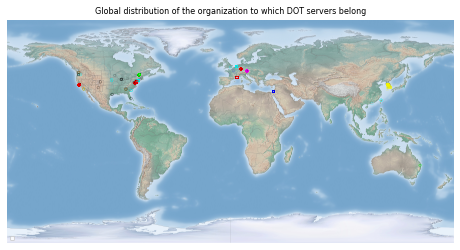

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
org_m = Basemap(resolution='c')
org_m.shadedrelief()
org_m.drawcoastlines(color='gray',linewidth=0.1)
org_m.drawcountries(color='gray',linewidth=0.1)
org_m.drawstates(color='gray',linewidth=0.1)

plot_map("NextDns", "Red", nextdns)
plot_map("SFR", "Blue", SFR)
plot_map("Cloudflare", "lime", Cloudflare)
plot_map("Cleanbrowsing", "cyan", Cleanbrowsing)
plot_map("broadNnet", "yellow", broadNnet)
plot_map("Telepark", "fuchsia", Telepark)
plot_map("Google", "aqua", Google)
plot_map("Comcast", "black", Comcast)
plot_map("Quad", "orange", Quad)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(fontsize=5, loc=3)
# bbox_to_anchor=(0.7, 0.8)
plt.title('Global distribution of the organization to which DOT servers belong', fontsize=8)
plt.savefig("./basemap-dot-org.pdf")
plt.show()

# 对流行ISP进行分析 

In [43]:
Hot_Net = ip_raw[ip_raw["isp"].str.contains("Hot-Net")]
print("Hot_Net",len(Hot_Net))
nextdns = ip_raw[ip_raw["isp"].str.contains("nextdns") | ip_raw["org"].str.contains("NextDNS")]
print("nextdns",len(nextdns))
Cloudflare = ip_raw[ip_raw["isp"].str.contains("Cloudflare")]
print("cloudflare",len(Cloudflare))
Daniel = ip_raw[ip_raw["isp"].str.contains("Daniel")]
print("Daniel",len(Daniel))
Broadband = ip_raw[ip_raw["isp"].str.contains("Broadband") | ip_raw["isp"].str.contains("BroadBand")]
print("Broadband",len(Broadband))
UNMC = ip_raw[ip_raw["isp"].str.contains("UNMC")]
print("UNMC",len(UNMC))
Telepark = ip_raw[ip_raw["isp"].str.contains("Telepark")]
print("Telepark",len(Telepark))
Oracle = ip_raw[ip_raw["isp"].str.contains("Oracle")]
print("Oracle",len(Oracle))
Fiber = ip_raw[ip_raw["isp"].str.contains("Fiber")]
print("Fiber",len(Fiber))

Hot_Net 2040
nextdns 2294
cloudflare 1031
Daniel 1020
Broadband 893
UNMC 381
Telepark 270
Oracle 255
Fiber 271


No handles with labels found to put in legend.


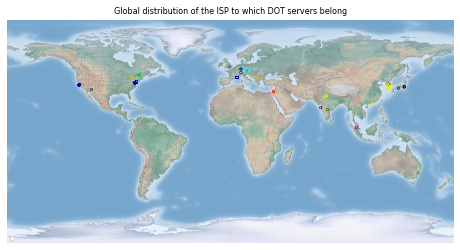

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
isp_m = Basemap(resolution='c')
isp_m.shadedrelief()
isp_m.drawcoastlines(color='gray',linewidth=0.1)
isp_m.drawcountries(color='gray',linewidth=0.1)
isp_m.drawstates(color='gray',linewidth=0.1)

plot_map("Hot_Net", "Red", Hot_Net)
plot_map("Nextdns", "Blue", nextdns)
plot_map("Cloudflare", "lime", Cloudflare)
plot_map("Daniel", "cyan", Daniel)
plot_map("Broadband", "yellow", Broadband)
plot_map("UNMC", "fuchsia", UNMC)
plot_map("Telepark", "aqua", Telepark)
plot_map("Oracle", "black", Oracle)
plot_map("Fiber", "orange", Fiber)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(fontsize=5, loc=3)
# bbox_to_anchor=(0.7, 0.8)
plt.title('Global distribution of the ISP to which DOT servers belong', fontsize=8)
plt.savefig("./basemap-dot-isp.pdf")
plt.show()

# 对国家进行分析 

In [19]:
print(ip_raw["country"].value_counts())
print("---------------------------")
print(ip_raw["country"].value_counts()/len(ip_raw)*100)

United States    7829
India            2767
Canada           2408
South Korea      2019
Germany          1505
                 ... 
Grenada             1
Paraguay            1
DR Congo            1
Costa Rica          1
Ghana               1
Name: country, Length: 110, dtype: int64
---------------------------
United States    33.752964
India            11.929295
Canada           10.381548
South Korea       8.704462
Germany           6.488467
                   ...    
Grenada           0.004311
Paraguay          0.004311
DR Congo          0.004311
Costa Rica        0.004311
Ghana             0.004311
Name: country, Length: 110, dtype: float64
